In [2]:
#@title Import Python Libraries
# General data science libraries
import pandas as pd
import numpy as np

# Pulling data from APIs, parsing JSON
import requests
import json


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# notebook.ipynb
def my_function(x):
    # Original function
    return x * 2

result = my_function(5)
print(result)


In [4]:
pd.set_option('display.max_colwidth', 200)
def load_newline_delimited_json(url):
    """Loads a newline-delimited JSON file from a URL into a pandas DataFrame.

    Args:
        url: The URL of the newline-delimited JSON file.

    Returns:
        A pandas DataFrame containing the data, or None if an error occurs.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes

        data = []
        for line in response.text.strip().split('\n'):
            try:
                data.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Skipping invalid JSON line: {line} due to error: {e}")

        return pd.DataFrame(data)
    except requests.exceptions.RequestException as e:
        print(f"Error downloading data: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [5]:
#@title Function to Process Results from Various MLB Stats API Endpoints
def process_endpoint_url(endpoint_url, pop_key=None):
  """
  Fetches data from a URL, parses JSON, and optionally pops a key.

  Args:
    endpoint_url: The URL to fetch data from.
    pop_key: The key to pop from the JSON data (optional, defaults to None).

  Returns:
    A pandas DataFrame containing the processed data
  """
  json_result = requests.get(endpoint_url).content

  data = json.loads(json_result)

   # if pop_key is provided, pop key and normalize nested fields
  if pop_key:
    df_result = pd.json_normalize(data.pop(pop_key), sep = '_')
  # if pop_key is not provided, normalize entire json
  else:
    df_result = pd.json_normalize(data)

  return df_result

In [6]:
sports_endpoint_url = 'https://statsapi.mlb.com/api/v1/sports'

sports = process_endpoint_url(sports_endpoint_url, 'sports')

display(sports)

,id,code,link,name,abbreviation,sortOrder,activeStatus
0,1,mlb,/api/v1/sports/1,Major League Baseball,MLB,11,True
1,11,aaa,/api/v1/sports/11,Triple-A,AAA,101,True
2,12,aax,/api/v1/sports/12,Double-A,AA,201,True
3,13,afa,/api/v1/sports/13,High-A,A+,301,True
4,14,afx,/api/v1/sports/14,Single-A,A,401,True
5,16,rok,/api/v1/sports/16,Rookie,ROK,701,True
6,17,win,/api/v1/sports/17,Winter Leagues,WIN,1301,True
7,21,min,/api/v1/sports/21,Minor League Baseball,Minors,1402,True
8,23,ind,/api/v1/sports/23,Independent Leagues,IND,2101,True
9,61,nlb,/api/v1/sports/61,Negro League Baseball,NLB,2401,True


In [7]:
#@title Leagues

# Can add "?sportId=1" to following URL for MLB only
leagues_endpoint_url = 'https://statsapi.mlb.com/api/v1/league'

leagues = process_endpoint_url(leagues_endpoint_url, 'leagues')

display(leagues)

,id,name,link,abbreviation,nameShort,seasonState,hasWildCard,hasSplitSeason,numGames,hasPlayoffPoints,...,seasonDateInfo_postSeasonEndDate,seasonDateInfo_seasonEndDate,seasonDateInfo_offseasonStartDate,seasonDateInfo_offSeasonEndDate,seasonDateInfo_seasonLevelGamedayType,seasonDateInfo_gameLevelGamedayType,seasonDateInfo_qualifierPlateAppearances,seasonDateInfo_qualifierOutsPitched,sport_id,sport_link
0,103,American League,/api/v1/league/103,AL,American,preseason,True,False,162.0,False,...,2025-10-31,2025-10-31,2025-11-01,2025-12-31,P,P,3.1,3.0,1.0,/api/v1/sports/1
1,104,National League,/api/v1/league/104,NL,National,preseason,True,False,162.0,False,...,2025-10-31,2025-10-31,2025-11-01,2025-12-31,P,P,3.1,3.0,1.0,/api/v1/sports/1
2,114,Cactus League,/api/v1/league/114,CL,Cactus,preseason,False,False,NaN,False,...,NaN,NaN,2025-03-26,2025-12-31,F,F,NaN,NaN,NaN,NaN
3,115,Grapefruit League,/api/v1/league/115,GL,Grapefruit,preseason,False,False,NaN,False,...,NaN,NaN,2025-03-26,2025-12-31,F,F,NaN,NaN,NaN,NaN
4,117,International League,/api/v1/league/117,INT,International,preseason,True,True,150.0,False,...,2025-09-28,2025-09-28,2025-09-29,2025-12-31,Y,Y,2.7,2.4,11.0,/api/v1/sports/11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,107,College Baseball,/api/v1/league/107,CBB,College Baseball,inseason,False,False,NaN,False,...,NaN,2025-09-04,2025-09-06,2025-12-31,Y,Y,NaN,NaN,22.0,/api/v1/sports/22
112,108,College Baseball,/api/v1/league/108,CBB,College Baseball,offseason,False,False,NaN,False,...,NaN,2020-12-31,NaN,2020-12-21,N,N,NaN,NaN,22.0,/api/v1/sports/22
113,587,Showcase Games,/api/v1/league/587,SG,Showcase Games,inseason,False,False,NaN,False,...,NaN,2025-12-31,NaN,2025-12-21,NaN,NaN,NaN,NaN,586.0,/api/v1/sports/586
114,625,Tournament 12,/api/v1/league/625,T12,Tournament 12,offseason,False,False,4.0,False,...,NaN,2022-09-24,2022-09-25,2022-12-31,Y,Y,NaN,NaN,NaN,NaN


In [8]:
#@title Seasons

# Use "?sportId=1" in following URL for MLB only
# Can also add "&withGameTypeDates=true" at end to get much more info on games
seasons_endpoint_url = 'https://statsapi.mlb.com/api/v1/seasons/all?sportId=1'

seasons = process_endpoint_url(seasons_endpoint_url, 'seasons')

display(seasons)

,seasonId,hasWildcard,preSeasonStartDate,seasonStartDate,regularSeasonStartDate,regularSeasonEndDate,seasonEndDate,offseasonStartDate,offSeasonEndDate,seasonLevelGamedayType,...,qualifierPlateAppearances,qualifierOutsPitched,postSeasonStartDate,postSeasonEndDate,lastDate1stHalf,allStarDate,firstDate2ndHalf,preSeasonEndDate,springStartDate,springEndDate
0,1876,False,1876-01-01,1876-04-22,1876-04-22,1876-10-09,1876-10-09,1876-10-10,1877-04-29,S,...,3.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1877,False,1877-01-01,1877-04-30,1877-04-30,1877-10-06,1877-10-06,1877-10-07,1878-04-30,S,...,3.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1878,False,1878-01-01,1878-05-01,1878-05-01,1878-09-30,1878-09-30,1878-10-01,1879-04-30,S,...,3.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1879,False,1879-01-01,1879-05-01,1879-05-01,1879-09-30,1879-09-30,1879-10-01,1880-04-30,S,...,3.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1880,False,1880-01-01,1880-05-01,1880-05-01,1880-10-01,1880-10-01,1880-10-02,1881-04-29,S,...,3.1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2022,True,2022-01-01,2022-02-27,2022-04-07,2022-10-05,2022-11-05,2022-11-06,2022-12-31,P,...,3.1,3.0,2022-10-07,2022-11-05,2022-07-17,2022-07-19,2022-07-21,2022-02-26,2022-02-27,2022-04-06
147,2023,True,2023-01-01,2023-02-24,2023-03-30,2023-10-02,2023-11-01,2023-11-02,2023-12-31,P,...,3.1,3.0,2023-10-03,2023-11-01,2023-07-09,2023-07-11,2023-07-14,2023-02-23,2023-02-24,2023-03-28
148,2024,True,2024-01-01,2024-02-22,2024-03-20,2024-09-30,2024-10-30,2024-10-31,2024-12-31,P,...,3.1,3.0,2024-10-01,2024-10-30,2024-07-14,2024-07-16,2024-07-19,2024-02-21,2024-02-22,2024-03-26
149,2025,True,2025-01-01,2025-02-20,2025-03-26,2025-09-28,2025-10-31,2025-11-01,2025-12-31,P,...,3.1,3.0,2025-09-30,2025-10-31,2025-07-14,2025-07-15,2025-07-19,2025-02-19,2025-02-20,2025-03-25


In [9]:
#@title All Players from 1 Season

# Pick single season to get all players for (default is 2024)
season = 2024 # @param {type:"integer"}

single_season_players_url = f'https://statsapi.mlb.com/api/v1/sports/1/players?season={season}'

players = process_endpoint_url(single_season_players_url, 'people')

display(players)

,id,fullName,link,firstName,lastName,primaryNumber,birthDate,currentAge,birthCity,birthStateProvince,...,batSide_code,batSide_description,pitchHand_code,pitchHand_description,nameMatrilineal,nickName,pronunciation,nameTitle,nameSuffix,lastPlayedDate
0,671096,Andrew Abbott,/api/v1/people/671096,Andrew,Abbott,41,1999-06-01,25,Lynchburg,VA,...,L,Left,L,Left,NaN,NaN,NaN,NaN,NaN,NaN
1,682928,CJ Abrams,/api/v1/people/682928,Paul,Abrams,5,2000-10-03,24,Alpharetta,GA,...,L,Left,R,Right,NaN,NaN,NaN,NaN,NaN,NaN
2,650556,Bryan Abreu,/api/v1/people/650556,Bryan,Abreu,52,1997-04-22,27,Santo Domingo Centro,NaN,...,R,Right,R,Right,Jimenez,NaN,NaN,NaN,NaN,NaN
3,547989,José Abreu,/api/v1/people/547989,José,Abreu,79,1987-01-29,38,Cienfuegos,NaN,...,R,Right,R,Right,Correa,Mal Tiempo,uh-BRAY-you,NaN,NaN,NaN
4,677800,Wilyer Abreu,/api/v1/people/677800,Wilyer,Abreu,52,1999-06-24,25,Maracaibo,NaN,...,L,Left,L,Left,Villalobos,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,666171,Ryan Zeferjahn,/api/v1/people/666171,Ryan,Zeferjahn,56,1998-02-28,26,Topeka,KS,...,R,Right,R,Right,NaN,NaN,NaN,NaN,NaN,NaN
1450,672582,Angel Zerpa,/api/v1/people/672582,Angel,Zerpa,61,1999-09-27,25,Valle de la Pascua,NaN,...,L,Left,L,Left,Palacios,NaN,AHN-hel SAIR-pah,NaN,NaN,NaN
1451,676604,Tyler Zuber,/api/v1/people/676604,Tyler,Zuber,53,1995-06-16,29,White Hall,AR,...,R,Right,R,Right,NaN,NaN,NaN,NaN,NaN,NaN
1452,691172,Yosver Zulueta,/api/v1/people/691172,Yosver,Zulueta,67,1998-01-23,27,Remedios,NaN,...,R,Right,R,Right,Gonzalez,NaN,YOHZ-ver zoo-loo-etta,NaN,NaN,NaN


In [10]:
#@title Teams
# Use "?sportId=1" in following URL for MLB only
teams_endpoint_url = 'https://statsapi.mlb.com/api/v1/teams?sportId=1'

teams = process_endpoint_url(teams_endpoint_url, 'teams')

display(teams)

,allStarStatus,id,name,link,season,teamCode,fileCode,abbreviation,teamName,locationName,...,springVenue_link,league_id,league_name,league_link,division_id,division_name,division_link,sport_id,sport_link,sport_name
0,N,133,Athletics,/api/v1/teams/133,2025,ath,ath,ATH,Athletics,Sacramento,...,/api/v1/venues/2507,103,American League,/api/v1/league/103,200,American League West,/api/v1/divisions/200,1,/api/v1/sports/1,Major League Baseball
1,N,134,Pittsburgh Pirates,/api/v1/teams/134,2025,pit,pit,PIT,Pirates,Pittsburgh,...,/api/v1/venues/2526,104,National League,/api/v1/league/104,205,National League Central,/api/v1/divisions/205,1,/api/v1/sports/1,Major League Baseball
2,N,135,San Diego Padres,/api/v1/teams/135,2025,sdn,sd,SD,Padres,San Diego,...,/api/v1/venues/2530,104,National League,/api/v1/league/104,203,National League West,/api/v1/divisions/203,1,/api/v1/sports/1,Major League Baseball
3,N,136,Seattle Mariners,/api/v1/teams/136,2025,sea,sea,SEA,Mariners,Seattle,...,/api/v1/venues/2530,103,American League,/api/v1/league/103,200,American League West,/api/v1/divisions/200,1,/api/v1/sports/1,Major League Baseball
4,N,137,San Francisco Giants,/api/v1/teams/137,2025,sfn,sf,SF,Giants,San Francisco,...,/api/v1/venues/2532,104,National League,/api/v1/league/104,203,National League West,/api/v1/divisions/203,1,/api/v1/sports/1,Major League Baseball
5,N,138,St. Louis Cardinals,/api/v1/teams/138,2025,sln,stl,STL,Cardinals,St. Louis,...,/api/v1/venues/2520,104,National League,/api/v1/league/104,205,National League Central,/api/v1/divisions/205,1,/api/v1/sports/1,Major League Baseball
6,N,139,Tampa Bay Rays,/api/v1/teams/139,2025,tba,tb,TB,Rays,Tampa,...,/api/v1/venues/2534,103,American League,/api/v1/league/103,201,American League East,/api/v1/divisions/201,1,/api/v1/sports/1,Major League Baseball
7,N,140,Texas Rangers,/api/v1/teams/140,2025,tex,tex,TEX,Rangers,Arlington,...,/api/v1/venues/2603,103,American League,/api/v1/league/103,200,American League West,/api/v1/divisions/200,1,/api/v1/sports/1,Major League Baseball
8,N,141,Toronto Blue Jays,/api/v1/teams/141,2025,tor,tor,TOR,Blue Jays,Toronto,...,/api/v1/venues/2536,103,American League,/api/v1/league/103,201,American League East,/api/v1/divisions/201,1,/api/v1/sports/1,Major League Baseball
9,N,142,Minnesota Twins,/api/v1/teams/142,2025,min,min,MIN,Twins,Minneapolis,...,/api/v1/venues/2862,103,American League,/api/v1/league/103,202,American League Central,/api/v1/divisions/202,1,/api/v1/sports/1,Major League Baseball


In [11]:
#@title Single Team Roster

# Pick single team ID to get roster for (default is 119 for Dodgers)
team_id = 119 # @param {type:"integer"}

single_team_roster_url = f'https://statsapi.mlb.com/api/v1/teams/{team_id}/roster?season=2025'

single_team_roster = process_endpoint_url(single_team_roster_url, 'roster')

display(single_team_roster)

,jerseyNumber,parentTeamId,person_id,person_fullName,person_link,position_code,position_name,position_type,position_abbreviation,status_code,status_description
0,51,119,681911,Alex Vesia,/api/v1/people/681911,1,Pitcher,Pitcher,P,A,Active
1,44,119,681624,Andy Pages,/api/v1/people/681624,8,Outfielder,Outfielder,CF,A,Active
2,43,119,607455,Anthony Banda,/api/v1/people/607455,1,Pitcher,Pitcher,P,A,Active
3,15,119,605131,Austin Barnes,/api/v1/people/605131,2,Catcher,Catcher,C,A,Active
4,78,119,676508,Ben Casparius,/api/v1/people/676508,1,Pitcher,Pitcher,P,A,Active
5,7,119,605483,Blake Snell,/api/v1/people/605483,1,Pitcher,Pitcher,P,A,Active
6,49,119,595014,Blake Treinen,/api/v1/people/595014,1,Pitcher,Pitcher,P,A,Active
7,28,119,676272,Bobby Miller,/api/v1/people/676272,1,Pitcher,Pitcher,P,A,Active
8,48,119,660813,Brusdar Graterol,/api/v1/people/660813,1,Pitcher,Pitcher,P,A,Active
9,3,119,621035,Chris Taylor,/api/v1/people/621035,7,Outfielder,Outfielder,LF,A,Active


In [12]:
#@title Single Player Information
# Pick single player ID to get info for (default is 660271 for Shohei Ohtani)
player_id = 660271 # @param {type:"integer"}

single_player_url = f'https://statsapi.mlb.com/api/v1/people/{player_id}/'

single_player_info_json = json.loads(requests.get(single_player_url).content)

display(single_player_info_json)

{'copyright': 'Copyright 2025 MLB Advanced Media, L.P.  Use of any content on this page acknowledges agreement to the terms posted here http://gdx.mlb.com/components/copyright.txt',
 'people': [{'id': 660271,
   'fullName': 'Shohei Ohtani',
   'link': '/api/v1/people/660271',
   'firstName': 'Shohei',
   'lastName': 'Ohtani',
   'primaryNumber': '17',
   'birthDate': '1994-07-05',
   'currentAge': 30,
   'birthCity': 'Oshu',
   'birthCountry': 'Japan',
   'height': '6\' 4"',
   'weight': 210,
   'active': True,
   'primaryPosition': {'code': 'Y',
    'name': 'Two-Way Player',
    'type': 'Two-Way Player',
    'abbreviation': 'TWP'},
   'useName': 'Shohei',
   'useLastName': 'Ohtani',
   'boxscoreName': 'Ohtani',
   'nickName': 'Showtime',
   'gender': 'M',
   'isPlayer': True,
   'isVerified': False,
   'pronunciation': 'show-HEY oh-TAWN-ee',
   'mlbDebutDate': '2018-03-29',
   'batSide': {'code': 'L', 'description': 'Left'},
   'pitchHand': {'code': 'R', 'description': 'Right'},
   'n

In [13]:
#@title Schedule / Games

# Pick single season to get schedule for (default is 2024)
season = 2024 # @param {type:"integer"}

# Can change season to get other seasons' games info
schedule_endpoint_url = f'https://statsapi.mlb.com/api/v1/schedule?sportId=1&season={season}'

schedule_dates = process_endpoint_url(schedule_endpoint_url, "dates")

games = pd.json_normalize(
    schedule_dates.explode('games').reset_index(drop = True)['games'])

display(games)

,gamePk,gameGuid,link,gameType,season,gameDate,officialDate,isTie,gameNumber,publicFacing,...,status.reason,description,rescheduleDate,rescheduleGameDate,rescheduledFrom,rescheduledFromDate,resumeDate,resumeGameDate,resumedFrom,resumedFromDate
0,748266,d5cb4300-04fc-4cd0-9a62-88099e61bd81,/api/v1.1/game/748266/feed/live,S,2024,2024-02-22T20:10:00Z,2024-02-22,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,748344,1ae43208-ddd5-4d32-af13-334857bddb80,/api/v1.1/game/748344/feed/live,E,2024,2024-02-23T18:05:00Z,2024-02-23,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,748263,33b22841-8ae2-4589-9e93-64bfe9efdf8a,/api/v1.1/game/748263/feed/live,S,2024,2024-02-23T20:05:00Z,2024-02-23,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,748341,1e162b85-6a35-4a0b-a0f1-da6ee9b74b4d,/api/v1.1/game/748341/feed/live,S,2024,2024-02-23T20:05:00Z,2024-02-23,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748260,a4192578-af76-46e9-be87-98dfe2ade3a6,/api/v1.1/game/748260/feed/live,S,2024,2024-02-23T20:08:00Z,2024-02-23,False,1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,775300,fb97fd78-be7e-4439-b30c-733a91400fbf,/api/v1.1/game/775300/feed/live,W,2024,2024-10-26T00:08:00Z,2024-10-25,False,1,True,...,NaN,World Series Game 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2994,775294,e8d50a03-7c3f-44f5-87bb-43476e34fe94,/api/v1.1/game/775294/feed/live,W,2024,2024-10-27T00:08:00Z,2024-10-26,False,1,True,...,NaN,World Series Game 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2995,775298,e6fed413-e8ca-4217-bdf0-d13912b4411a,/api/v1.1/game/775298/feed/live,W,2024,2024-10-29T00:08:00Z,2024-10-28,False,1,True,...,NaN,World Series Game 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2996,775297,79cb2c8c-d698-49f7-9c33-0bb7a6895efb,/api/v1.1/game/775297/feed/live,W,2024,2024-10-30T00:08:00Z,2024-10-29,False,1,True,...,NaN,World Series Game 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#@title Read in MLB Fan Favorites/Follows Data from Google Cloud Storage
mlb_fan_favorites_json_file = 'https://storage.googleapis.com/gcp-mlb-hackathon-2025/datasets/mlb-fan-content-interaction-data/2025-mlb-fan-favs-follows.json'

mlb_fan_favorites_df = load_newline_delimited_json(mlb_fan_favorites_json_file)

# Convert favorite team ID to integer format
mlb_fan_favorites_df['favorite_team_id'] = (
  mlb_fan_favorites_df['favorite_team_id'].astype('Int64'))

display(mlb_fan_favorites_df.head())

,user_id,favorite_team_id,followed_player_ids,followed_team_ids
0,K1M8UWG6EIITHOR,108,[],"[116, 147, 139, 133]"
1,1LOQWJRV7HJYY9P,108,[],"[147, 138]"
2,HCFH38U843NWUO2,108,[],"[135, 117, 143, 119, 141, 115]"
3,8JYOELC88CWR9DP,108,[],"[141, 109, 112, 115, 119]"
4,7KLHPSVVE87D69B,108,[],"[120, 110]"


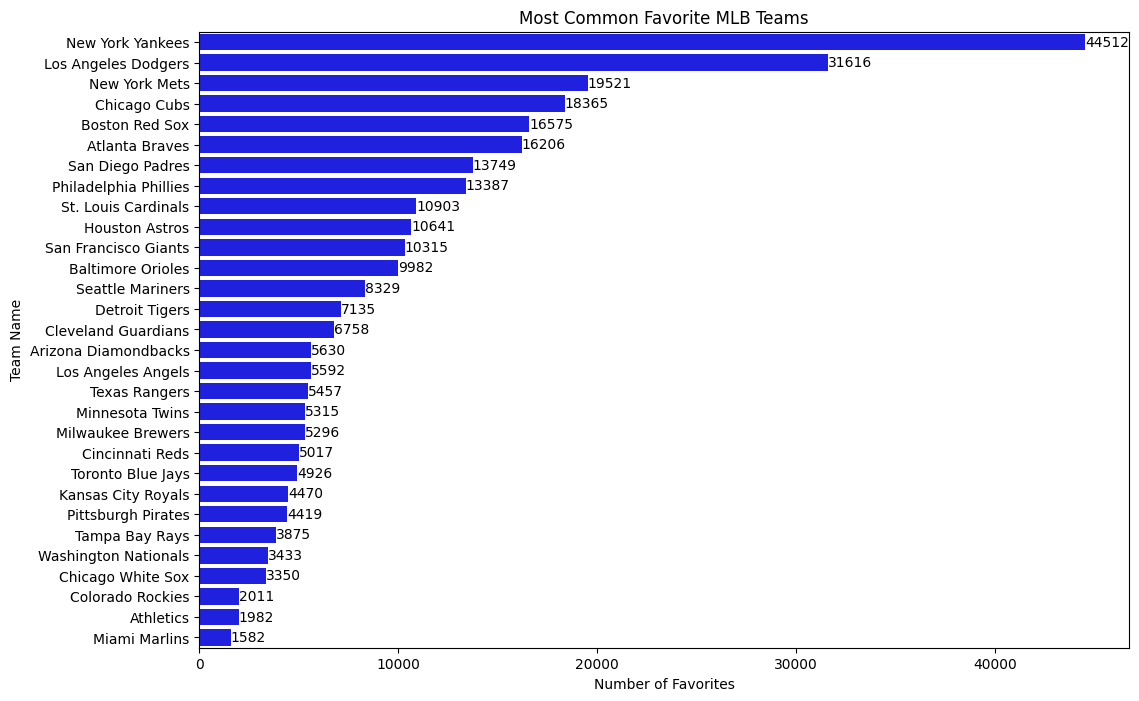

In [15]:
#@title Look at Most Common Favorite MLB Teams
most_common_favorite_teams = (pd.merge(
  mlb_fan_favorites_df['favorite_team_id'].value_counts().reset_index().
    rename(columns = {"count": "num_favorites"}),
  teams[['id', 'name']].
    rename(columns = {"id": "team_id", "name": "team_name"}),
  left_on = 'favorite_team_id',
  right_on = 'team_id',
  how = 'left'
  )[['team_id', 'team_name', 'num_favorites']]
  )

# Create barplot showing most common favorite MLB teams
plt.figure(figsize=(12, 8))
sns.barplot(x='num_favorites', y='team_name', data=most_common_favorite_teams,
    orient='h', color='blue')
plt.title('Most Common Favorite MLB Teams')
plt.xlabel('Number of Favorites')
plt.ylabel('Team Name')

# Add text labels for # of favorites next to each bar
for index, row in most_common_favorite_teams.iterrows():
  plt.text(row['num_favorites'], index, str(row['num_favorites']),
    color='black', ha='left', va='center')

plt.show()

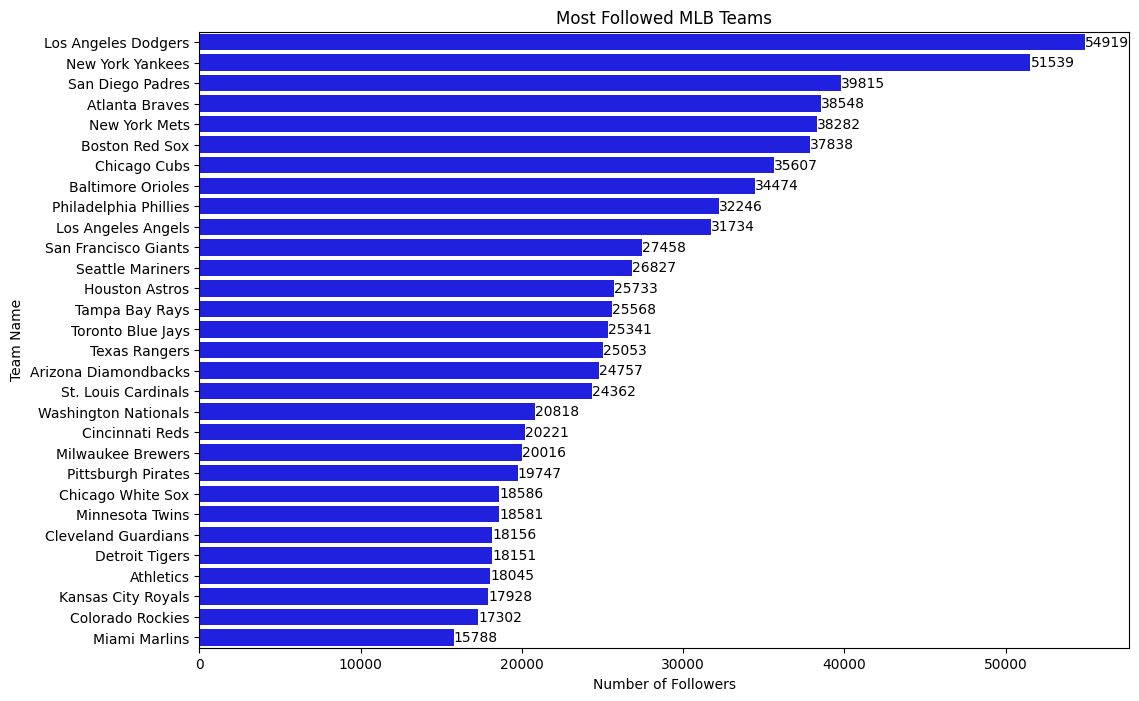

In [16]:
#@title Look at Most Followed MLB Teams

# Explode the 'followed_team_ids' column to create 1 row for each followed team
mlb_fan_follows_expanded_df = (mlb_fan_favorites_df.
  explode('followed_team_ids').
  reset_index(drop=True)
  )

# Convert followed team IDs to integer format
mlb_fan_follows_expanded_df['followed_team_ids'] = (
  mlb_fan_follows_expanded_df['followed_team_ids'].astype('Int64'))

most_followed_teams = (pd.merge(
  mlb_fan_follows_expanded_df['followed_team_ids'].value_counts().reset_index().
    rename(columns = {"count": "num_followers"}),
  teams[['id', 'name']].
    rename(columns = {"id": "team_id", "name": "team_name"}),
  left_on = 'followed_team_ids',
  right_on = 'team_id',
  how = 'left'
  )[['team_id', 'team_name', 'num_followers']]
  )

# Create barplot showing most followed MLB teams
plt.figure(figsize=(12, 8))
sns.barplot(x='num_followers', y='team_name', data=most_followed_teams,
    orient='h', color='blue')
plt.title('Most Followed MLB Teams')
plt.xlabel('Number of Followers')
plt.ylabel('Team Name')

# Add text labels for # of followers next to each bar
for index, row in most_followed_teams.iterrows():
  plt.text(row['num_followers'], index, str(row['num_followers']),
    color='black', ha='left', va='center')

plt.show()

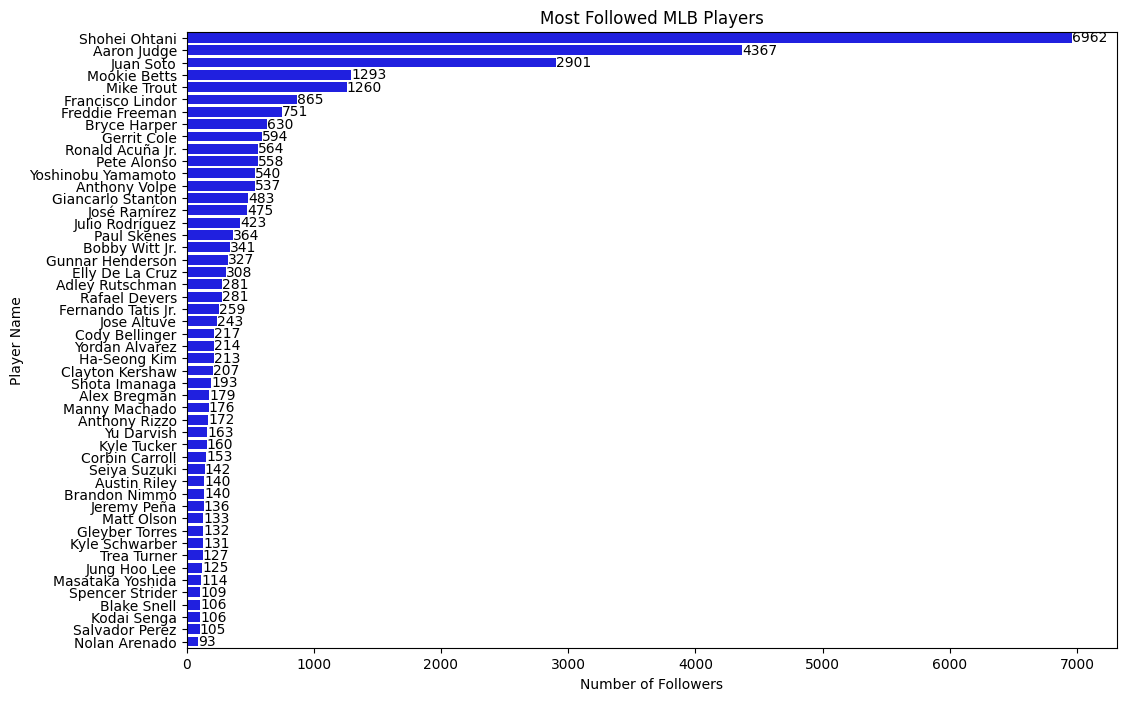

In [17]:
#@title Look at Most Followed MLB Players

# Explode 'followed_player_ids' column to create 1 row for each followed player
mlb_fan_followed_players_expanded_df = (mlb_fan_favorites_df.
  explode('followed_player_ids').
  reset_index(drop=True)
  )

# Convert followed player IDs to integer format
mlb_fan_followed_players_expanded_df['followed_player_ids'] = (
  mlb_fan_followed_players_expanded_df['followed_player_ids'].astype('Int64'))

# Get list of Top N players by number of followers (including player names)
most_followed_players = (pd.merge(
  mlb_fan_followed_players_expanded_df['followed_player_ids'].
    value_counts().
    reset_index().
    rename(
      columns = {
        "followed_player_ids": "player_id",
        "count": "num_followers"
        }),
  players[['id', 'nameFirstLast']].
    rename(
      columns = {"id": "player_id", "nameFirstLast": "player_name"}
      ),
  on = 'player_id',
  how = 'left'
  ).
  # Filter to top 50 players
  nlargest(50, 'num_followers')
  )

most_followed_players

# Create barplot showing most followed MLB players
plt.figure(figsize=(12, 8))
sns.barplot(x='num_followers', y='player_name', data=most_followed_players,
    orient='h', color='blue')
plt.title('Most Followed MLB Players')
plt.xlabel('Number of Followers')
plt.ylabel('Player Name')

# Add text labels for # of followers next to each bar
for index, row in most_followed_players.iterrows():
  plt.text(row['num_followers'], index, str(row['num_followers']),
    color='black', ha='left', va='center')

plt.show()

In [18]:
#@title Get MLB Film Room Video Clip for Last Play from Specific Game
# Pick game to get last play from (default is game_pk 747066, for Braves-Royals
# game with Travis d'Arnaud walk-off HR on 9/28/2024)
game_pk = '747066' #@param{type:"string"}

single_game_feed_url = f'https://statsapi.mlb.com/api/v1.1/game/{game_pk}/feed/live'

single_game_info_json = json.loads(requests.get(single_game_feed_url).content)

single_game_play = single_game_info_json['liveData']['plays']['currentPlay']

single_game_play_id = single_game_play['playEvents'][-1]['playId']

single_play_video_url = f'https://www.mlb.com/video/search?q=playid=\"{single_game_play_id}\"'

display(single_play_video_url)

'https://www.mlb.com/video/search?q=playid="ba04fcba-8fea-4f49-8768-6dc9230bbbe5"'

In [20]:
from vertexai.preview.generative_models import GenerativeModel

model = GenerativeModel("gemini-1.5-pro")

prompt = f"""
Baseball Tournament Fans Club. Help fans to create catchy taglines for their teams.

input: {players, most_followed_players, most_common_favorite_teams, most_followed_teams}
output: best player or teams details most followed

input: {games, single_player_info_json, teams, single_game_info_json, single_game_play, single_play_video_url}
output: Scheduled games with team and player information



"""

responses = model.generate_content(
    prompt,
    generation_config={
        "temperature": 1.5,
        "max_output_tokens": 2048,
        "top_p": 1.0,
        "top_k": 40,
    },
    stream=True
    )

for response in responses:
    print(response.text)

Okay
, I can help you create catchy taglines based on the information you provided!
 

**Taglines Inspired by Player Names and Skills**

* **Andrew
 Abbott:** "Abbotizing the Competition" or "Abbott's Pitching Arsenal"
* **CJ Abrams:** "  "Abracadabra -  
Abrams Steals Another!" or "CJ: Speed Thrills on the Basepaths!" (Playing on his fast running)
* **José Abreu:** "
Abreu Power!" (Known for hitting home runs) or "Fear Mal Tiempo!" (using his nickname) 
* **Ryan Zeferjahn:** "Zeferjahn's Bringing the Heat" (if he's
 a hard-throwing pitcher), or "Z for Zeferjahn - Z for Victory"
* **Tyler Zuber:** "Zuber Strong" 
* **Shohei Ohtani: "**The Two-Way Sho
 - Unstoppable Ohtani!" or "Showtime Steals the Show!" (using his nickname)

**Team Taglines Based on Data**

* **New York Yankees:** "The Bronx Bombers:  Most Favorited - Most Feared!" (Using the ranking info) 
* **Los Angeles
 Dodgers:** "Dodger Nation: Deepest Lineup - Biggest Following" (Using the numbers you provided)

**Taglines Idea